# Module Efficiency History and Projections

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

This journal covers the development of a historical baseline and baseline future projection of average CdTe module efficiency for each installation year.

In [2]:
sns.set_style("white")

plt.rcParams.update({'font.size': 28})
plt.rcParams['figure.figsize'] = (30, 15)

cwd = os.getcwd() #grabs current working directory

supportMatfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
baselinesFolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines')

In [3]:
cdte_eff = pd.read_excel(os.path.join(supportMatfolder, 'RELOG_PV_ICE.xlsx'), sheet_name='CdTe timeline and data', index_col='Year')
cdte_eff = cdte_eff[['Efficiency (%)']]

In [4]:
cdte_eff

,Efficiency (%)
Year,
1995,10.600000
1996,9.100000
1997,9.200000
1998,NaN
1999,10.500000
2000,10.500000
2001,NaN
2002,NaN
2003,7.000000


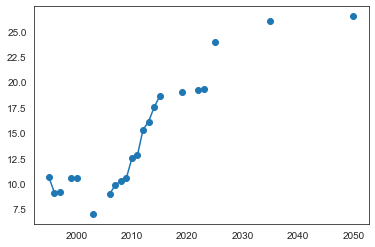

In [5]:
plt.plot(cdte_eff['Efficiency (%)'], marker='o')

The points before 2000 were "big" modules before they were commercialized. I will drop there and count only modules from 2000 onward which are the modules that actually reached the market. The data was collected from [First Solar annual reports](https://investor.firstsolar.com/financials/annual-reports/default.aspx) and NREL's [Champion Module Efficiency Chart](https://www.nrel.gov/pv/module-efficiency.html).

In [6]:
cdte_eff.index

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
            2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
            2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
            2050],
           dtype='int64', name='Year')

Dropped the 90's.

In [7]:
cdte_eff = cdte_eff.loc[2001:2051]
cdte_eff;

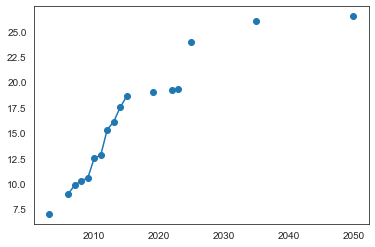

In [8]:
plt.plot(cdte_eff.index, cdte_eff['Efficiency (%)'], marker='o')

Now interpolate for missing years. Going to break into 2 parts for this, a linear historical part, and an exponential decay out to 2050.

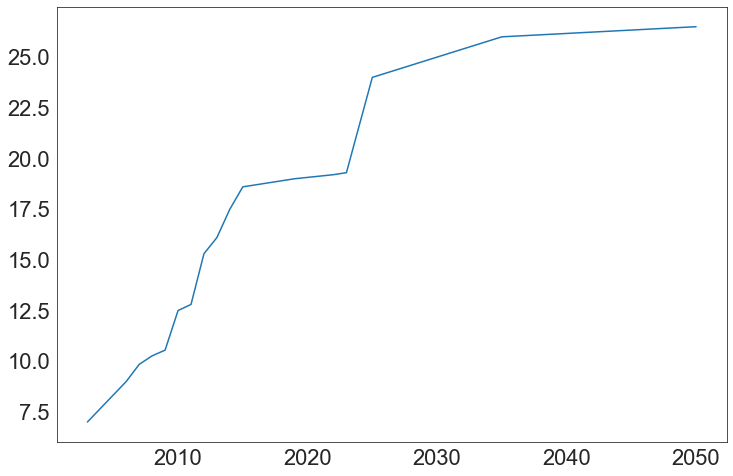

In [16]:
mod_eff_early = cdte_eff.loc[(cdte_eff.index<=2050)]
mod_eff_history = mod_eff_early.interpolate(method='linear',axis=0)
#print(mod_eff_history)
plt.plot(mod_eff_history)

The following cells are meant to create an exponential decay. However, if I follow the assumption of the [Cadmium Telluride Accelerator Consortium (CTAC)](https://www.nrel.gov/pv/cadmium-telluride-photovoltaics-accelerator-consortium-solicitation.html) where it aims to **reach 24% efficiency in 2025 and 26% efficiency in 2035**, it is best if I do a linear interpolation. Therefore I will comment out these cells.

In [18]:
# # Import curve fitting package from scipy
# from scipy.optimize import curve_fit
# # Function to calculate the power-law with constants a and b
# def power_law(x, a, b):
#     return a*np.power(x, b)

In [19]:
# cdte_eff['Efficiency (%)'][2021]

In [17]:
# #generae a dataset for the area in between
# cdte_eff_late = cdte_eff.loc[(cdte_eff.index>=2021)]
# y_dummy = power_law(cdte_eff_late.index-2020, cdte_eff_late['Efficiency (%)'][2021], 0.0859) 
# #played around with the exponential until y_dummy[26] closely matched projected 26.00% value from the Cadmium Telluride Accelerator Consortium
# print(y_dummy[28])
# plt.plot(y_dummy)

In [20]:
# #create a dataframe of the projection
# cdte_eff_late['Efficiency (%)'] = y_dummy
# #print(mod_eff_late)
# plt.plot(cdte_eff_late)
# #mod_eff_late.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_module_eff_perovskite.csv', index=True)

Now smash the two dataframes back together for our average module efficiency baseline.

Text(0, 0.5, 'Efficiency (%)')

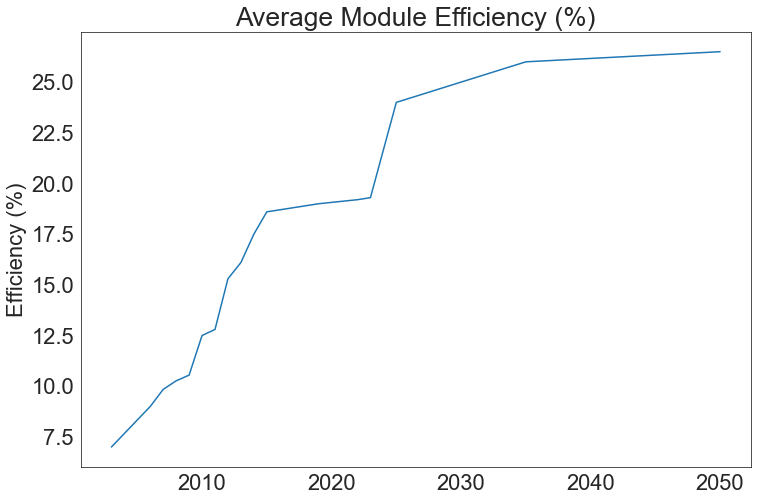

In [23]:
#cd_temod_eff = pd.concat([mod_eff_history, cdte_eff_late]) # This line is to concatenate in case I make the exponential decay
mod_eff_history.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_avg_module_cdte_eff_final.csv', index=True)
plt.plot(mod_eff_history)
plt.title('Average Module Efficiency (%)')
plt.ylabel('Efficiency (%)')

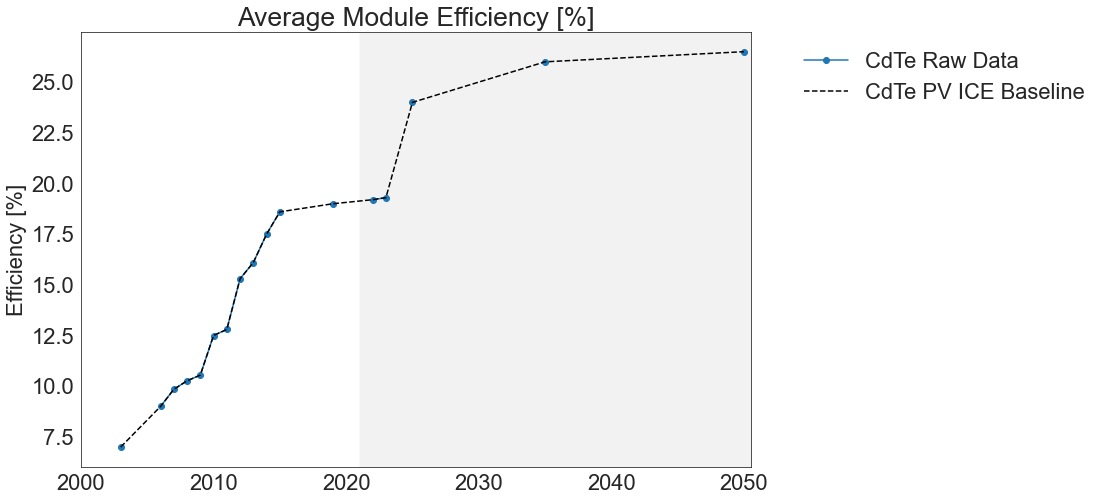

In [25]:
#graph for paper
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

plt.axvspan(2021, 2050.5, facecolor='gray', alpha=0.1)
plt.plot(cdte_eff, marker='o', label='CdTe Raw Data')
plt.plot(mod_eff_history, '--k', label='CdTe PV ICE Baseline')
plt.title('Average Module Efficiency [%]')
plt.ylabel('Efficiency [%]')
plt.legend()
plt.xlim([2000, 2050.5])
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.0), loc='upper left')